# Pattern Recognition Assignments 2: Classification

Se preparan todas las librerías necesarias para ejecutar el programa

In [236]:
# Se importa la librería numpy
import numpy as np

# Librería para los Plots
import matplotlib.pyplot as plt

# Imports de la libreria scipy
from scipy.spatial.distance import cdist

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Support vector machines
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# K-Nearest Neighbors

- **Q1**) Primero se tiene que implementar una función que haga la clasificación kNN para clasificar el dataset Iris.

In [237]:
# Se crean unas variables para guardar los datos de Iris y sus labels
# Como el fichero tiene una línea al final, se pone el if x.strip(), ya que si esta vació, esta línea no la coge.
data_Iris = np.array([map(float,x.split(',')[:-1]) for x in open('iris.data') if x.strip()])
labels_Iris = np.array([x.split(',')[-1].strip() for x in open('iris.data') if x.strip()])

# Se cargan las matrices para los indices de los grupos de test y los grupos de entrenamiento
train_ = np.loadtxt('iris_idx_train.txt')
test_ = np.loadtxt('iris_idx_test.txt')

# Como son indices, se pasan a integers
train_Index = train_.astype(int)
test_Index = test_.astype(int)

# Se crean las dos matrices a partir de los indices de entrenamiento
train_dataIris = data_Iris[train_Index,:]
train_labelsIris = labels_Iris[train_Index]

# Se crean las dos matrices a partir de los indeces de test
test_dataIris = data_Iris[test_Index,:]
test_labelsIris = labels_Iris[test_Index]


Una vez se tienen los datos, ya se puede pasar a realizar el algoritmo ***kNN*** que se implementará para un k desde 1 a 9:

In [238]:
# Definición de una función para calcular la exactitud de la detección
def getAccuracy(calc_labels, results):
    correct = 0
    for i in range(len(results)):
        if calc_labels[i][-1] == results[i]:
            correct += 1
    return (correct/float(len(results))) * 100.0
  
acc_plot = []
index = []
# Definición del algoritmo kNN:
def kNN_function(train_data, train_labels, test_data, test_labels):
    for k in range(1,10):
        # Primero se debe asignar la distancia entre los puntos de los dos test de datos
        distance = cdist(train_data,test_data)
        # Ahora se tiene que encontrar los valores más cercanos
        minimum_dist = np.argsort(distance.T,1)[:,1:k+1]
        # Con las etiquetas ordenadas, ahora se debe actualizar las etiquetas
        minimum_labels = train_labels[minimum_dist]
        #print minimum_labels
        #print test_labels
        #Por ultimo se debe adquirir la accuraccy
        Acc_Value = getAccuracy(minimum_labels,test_labels)
        #Acc_Value = getAccuracy(train_data,minimum_labels)
        print 'Accuracy for k = ', k, ':   ',Acc_Value,'%.'
        #acc = accuracy_score(test_labels, [Counter(x).most_common()[0][0] for x in minimum_labels] )
        #print 'Accuracy ',k,':', acc
        # Save the accuracy of the odd numbers
        if(k%2 != 0):
            acc_plot.append(Acc_Value)
            index.append(k)
        
        
# We call the function with the train and test splits

kNN_function(train_dataIris, train_labelsIris, test_dataIris, test_labelsIris)

Accuracy for k =  1 :    94.0 %.
Accuracy for k =  2 :    92.0 %.
Accuracy for k =  3 :    98.0 %.
Accuracy for k =  4 :    94.0 %.
Accuracy for k =  5 :    92.0 %.
Accuracy for k =  6 :    90.0 %.
Accuracy for k =  7 :    88.0 %.
Accuracy for k =  8 :    82.0 %.
Accuracy for k =  9 :    84.0 %.


La precisión no es tan buena como con las funciones kNN del módulo *sklearn.neighbors*, pero es bastante buena. El siguiente paso es hacer lo mismo con los valores de *3DClothing dataset*:

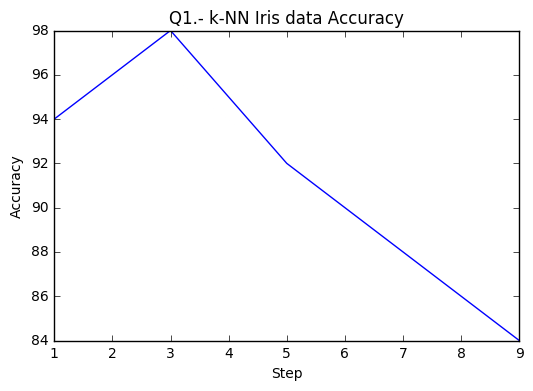

In [239]:
# Plot the accuracy of Iris kNN classifier
# Define the descriptors
plt.title("Q1.- k-NN Iris data Accuracy")
plt.xlabel("Step")
plt.ylabel("Accuracy")

#Plot the Accuracy
plt.plot(index, acc_plot)
plt.show()

Se repite todo para los datos de 3D clothing

Accuracy for k =  1 :    56.5217391304 %.
Accuracy for k =  2 :    57.9710144928 %.
Accuracy for k =  3 :    55.5555555556 %.
Accuracy for k =  4 :    56.5217391304 %.
Accuracy for k =  5 :    57.0048309179 %.
Accuracy for k =  6 :    55.0724637681 %.
Accuracy for k =  7 :    50.2415458937 %.
Accuracy for k =  8 :    46.8599033816 %.
Accuracy for k =  9 :    43.961352657 %.


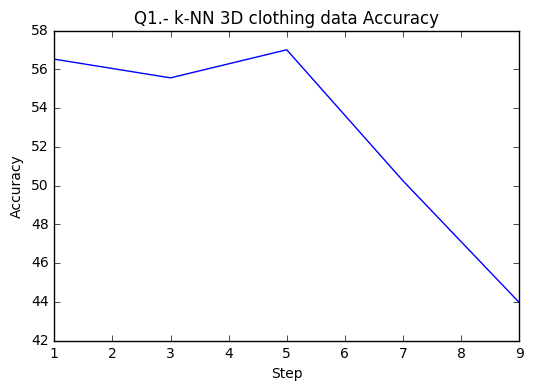

In [240]:
# Se repite el código con clothing dataset

# Se cargan las labels de los datos 3D clothing
labels_3D_test = np.array([x.strip() for x in open('3dclothing_labels_test.txt') if x.strip()])
labels_3D_train = np.array([x.strip() for x in open('3dclothing_labels_train.txt') if x.strip()])

# Ahora se cargan los datos de test y train
train_3D = np.load('3dclothing_train.npy')
test_3D = np.load('3dclothing_test.npy')

# Reset the plot variables
acc_plot = []
index = []

kNN_function(train_3D, labels_3D_train, test_3D, labels_3D_test)

# Plot the accuraccy
# Plot the accuracy of Iris kNN classifier
# Define the descriptors
plt.title("Q1.- k-NN 3D clothing data Accuracy")
plt.xlabel("Step")
plt.ylabel("Accuracy")

#Plot the Accuracy
plt.plot(index, acc_plot)
plt.show()

- **Q2** Primero va os a dividir el problema para trabajar con solo dos clases. Tenemos que dividir los datos para obtener las instacias que correspondan a **shirt** y **jeans**.

In [241]:
# Con los datos obtenidos, se tienen que crear unos nuevos datasets con los datos únicamente de shirt y jeans
label_3D_test_2class = []
label_3D_train_2class = []
train_3D_2class = []
test_3D_2class = []

# Se buscan en la matriz todos los parametros que tiene la etiqueta jeans o shirt
## Para valores de test
for i in range(0,labels_3D_test.size):
    if((labels_3D_test[i] == 'shirt') or (labels_3D_test[i] == 'jeans')):
        label_3D_test_2class.append(labels_3D_test[i])
        test_3D_2class.append(test_3D[i])
        
## Para los valores de entrenamiento
for i in range(0,labels_3D_train.size):
    if((labels_3D_train[i] == 'shirt') or (labels_3D_train[i] == 'jeans')):
        label_3D_train_2class.append(labels_3D_train[i])
        train_3D_2class.append(train_3D[i])    

Lo siguiente será entrenar el **Logistic regression classifier** y ajustar el valor *C* para una validación cruzada.

In [242]:
# Ahora se entrena el clasificador
## Se inicializan las variables
Index_2Class = []
Score_2Class = []

for c in range(-7,8):
    Log_reg = LogisticRegression(C = 10**c)
    # Store the index
    Index_2Class.append(c)
    # Se ajusta el clasificador
    Log_reg.fit(train_3D_2class,label_3D_train_2class)
    Score_2Class.append(Log_reg.score(test_3D_2class, label_3D_test_2class))

Dibujar un Plot con la precisión de los valores de entrenamiento y validación, e imprimir la precisión de test para el modelo seleccionado

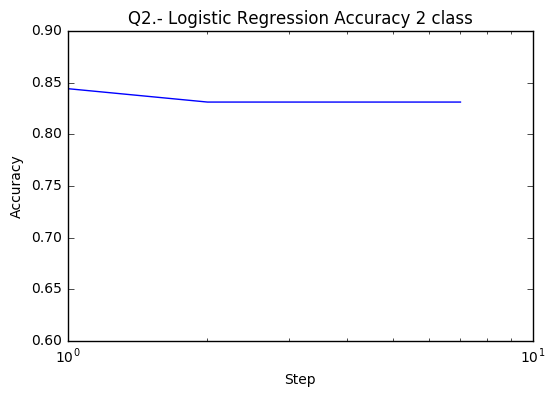

Q2.- The best Clasiffier is the index:  3  with the value:  0.883116883117


In [243]:
# Plot the accuraccy of logistic regression classifier with 2 param
# Define the descriptors
plt.title("Q2.- Logistic Regression Accuracy 2 class")
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.xscale('log')

#Plot the Accuracy
plt.plot(Index_2Class, Score_2Class)
plt.show()

# Print the best accuracy
best_clas = np.argmax(Score_2Class)
print 'Q2.- The best Clasiffier is the index: ', best_clas, ' with the value: ', Score_2Class[best_clas]

- **Q3** Ahora se repite el punto anterior pero utilizando todo el data set.

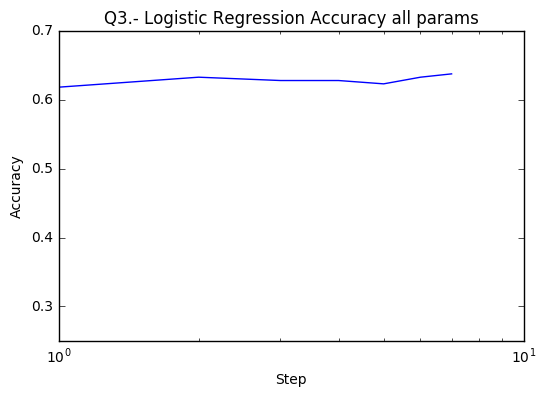

Q3.- The best Clasiffier is the index:  4  with the value:  0.666666666667


In [244]:
# Ahora se entrena el clasificador
## Se inicializan las variables
Index_Full = []
Score_Full = []

for c in range(-7,8):
    Log_reg = LogisticRegression(C = 10**c)
    # Store the index
    Index_Full.append(c)
    # Se ajusta el clasificador
    Log_reg.fit(train_3D,labels_3D_train)
    Score_Full.append(Log_reg.score(test_3D, labels_3D_test))
    
# Plot the accuraccy of logistic regression classifier with all the params
# Plot the accuracy of Iris kNN classifier
# Define the descriptors
plt.title("Q3.- Logistic Regression Accuracy all params")
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.xscale('log')

#Plot the Accuracy
plt.plot(Index_Full, Score_Full)
plt.show()

# Print the best accuracy
best_Full = np.argmax(Score_Full)
print 'Q3.- The best Clasiffier is the index: ', best_Full, ' with the value: ', Score_Full[best_Full]

- **Q4** Primero hay que analizar el clasificador para ver que valores se necesitan guardar

In [245]:
# Imprimir en pantalla los coeficientes que se obtienen desde el Log_Reg
print dir(Log_reg),'\n\n\n'

print 'Q4.- Para poder efectuar una Logistic regression classification, necesitamos dos variables, el valor'
print 'llamado de intercept (el valor del criterio cuando el predictor es igual a cero) y el valor del '
print 'coeficiente regressión. En el caso de este clasificador, estos valores vienen en las variables'
print '.intercept_ y .coef_'

['C', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_estimator_type', '_get_param_names', '_predict_proba_lr', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'fit_transform', 'get_params', 'intercept_', 'intercept_scaling', 'max_iter', 'multi_class', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'transform', 'verbose', 'warm_start'] 



Q4.- Para poder efectuar una Logistic regression classification, necesitamos dos variables, el valor
llamado de intercept (el valor del criterio cuando el predictor es igual a cero) y el valor del 
coeficiente regressión. En el caso de este clasificador, estos valores vienen en las variables
.int

Lo siguiente es obtener estos valores de la clasificación que se ha hecho en el punto **Q2** para clasificar las muestras de *shirts* y *jeans* y recalcular los valores para los datos de test usando la formula de logistic regression classifier

In [246]:
Index_2Class_2 = []
Score_2Class_2 = []

for c in range(-7,8):
    Log_reg = LogisticRegression(C = 10**c)
    # Store the index
    Index_2Class_2.append(c)
    # Se ajusta el clasificador
    Log_reg.fit(train_3D_2class,label_3D_train_2class)
    # Se guarda el valor de los coeficientes coef_ y intercept_
    coeficiente = Log_reg.coef_
    inter = Log_reg.intercept_
    # Se calcula el clasificador utilizando la formula del clasificador
    # y = 1/(1+e^-(x*theta + b))
    score = 1/(1+(np.exp(-np.dot(test_3D_2class, coeficiente.T)-inter)))
    # Se busca el mejor valor
    Valor = np.max(score)
    # Se guarda el valor
    Score_2Class_2.append(Valor)

# Print the results
print 'Q4.- Los resultados son:\n', Score_2Class_2
# Print the best accuracy
best_clas_2 = np.argmax(Score_2Class_2)
print '\nQ4.- The best Clasiffier is the index: ', best_clas_2, ' with the value: ', Score_2Class_2[best_clas_2]


Q4.- Los resultados son:
[0.57798300483707576, 0.84059304384554079, 0.98418614604266696, 0.99934597253990576, 0.99999803930945952, 0.99999999999875588, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Q4.- The best Clasiffier is the index:  6  with the value:  1.0


## Support Vector Machines

- **Q5**  Para este ejercidio utilizaremos un *synthetic dataset* que tiene solo dos dimensiones. lo primero es añadir la función proporcionada para visualizar los datos

In [250]:
# Adapted from: Gael Varoquaux, Andreas Muller; "Classifier comparison"  
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html  
def paint_decision_functions(data, labels, clf):  
    from matplotlib.colors import ListedColormap  
    import pylab  
    cm = pylab.cm.RdBu  
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])  
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5  
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  
                         np.arange(y_min, y_max, 0.1))  
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  
    pylab.contourf(xx, yy, Z, cmap=cm, alpha=.8)  
    pylab.scatter(data[:, 0], data[:, 1], c=labels, cmap=cm_bright)  
    pylab.xlim(xx.min(), xx.max())  
    pylab.ylim(yy.min(), yy.max())  
    pylab.xticks(())  
    pylab.yticks(())  
    pylab.show()  

Ahora se debe entrenar una *Support Vector Machine* lineal y un SVM utilizando la función *Gaussian Radial Basis* utilizando los datos divididos al 50% para test y entrenamiento. 

Q5.- El resultado aplicando el Linear SVM es:  0.951871657754

Q5.- El resultado aplicando el Gauss SVM es:  0.941176470588


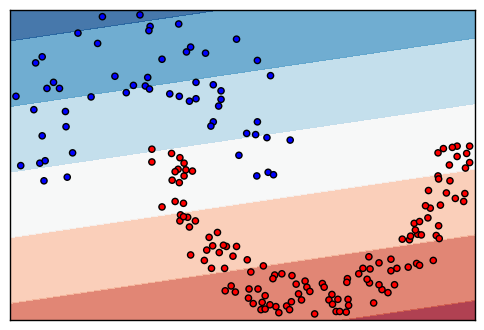

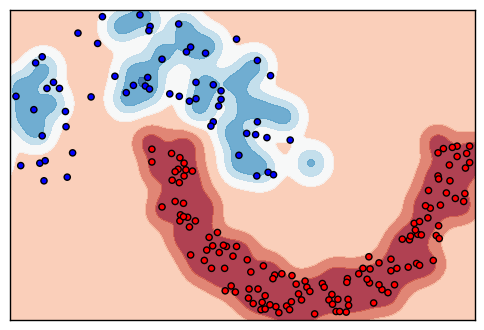

Q5.- Como se puede ver en los resultados, la forma gaussiana ajusta mucho mejor las muestras en las
regiones.


In [256]:
jain = np.loadtxt('jain.txt')

## Se desordena el array
np.random.shuffle(jain)

# Se dividen los datos y los labels en 2 al 50%
jain_train = jain[:len(jain)/2,:-1]
jain_train_labels= jain[:len(jain)/2,-1]

jain_test = jain[len(jain)/2:,:-1]
jain_test_labels = jain[len(jain)/2:,-1]

# Se calcula el linear SVM
linearSVM = LinearSVC(C=1)
linearSVM.fit(jain_train, jain_train_labels)
Score_LinearSVM = linearSVM.score(jain_test, jain_test_labels)
print 'Q5.- El resultado aplicando el Linear SVM es: ', Score_LinearSVM

# Se calcula el Gaussian SVM
GaussSVM = SVC(C=1)
GaussSVM.fit(jain_train, jain_train_labels)
Score_GaussSVM = GaussSVM.score(jain_test, jain_test_labels)
print '\nQ5.- El resultado aplicando el Gauss SVM es: ', Score_GaussSVM

# Se aplica la función para imprimir los resultados
## Resultado lineal
paint_decision_functions(jain_test, jain_test_labels, linearSVM)
## Resultado Gaussiano
paint_decision_functions(jain_test, jain_test_labels, GaussSVM)

print 'Q5.- Como se puede ver en los resultados, la forma gaussiana ajusta mucho mejor las muestras en las'
print 'regiones.'

- **Q6** Ahora se deben repetir los resultados con datos reales, utilizando la clasificación *jeans* y *shirts*. 

In [262]:
# Se repite el cálculo utilizando los datos obtenidos en Q2

# Se calcula el linear SVM
linearSVM_2class = LinearSVC(C=1)
linearSVM_2class.fit(train_3D_2class, label_3D_train_2class)
Score_LinearSVM_2class = linearSVM_2class.score(test_3D_2class, label_3D_test_2class)
print 'Q6.- El resultado aplicando el Linear SVM es: ', Score_LinearSVM_2class

# Se calcula el Gaussian SVM
GaussSVM_2class = SVC(C=1)
GaussSVM_2class.fit(train_3D_2class, label_3D_train_2class)
Score_GaussSVM_2class = GaussSVM_2class.score(test_3D_2class, label_3D_test_2class)
print '\nQ6.- El resultado aplicando el Gauss SVM es: ', Score_GaussSVM_2class

print '\nQ6.- El resultado que se ve ahora ha empeorado respecto al obtenido en el logistic regresion classifier,'
print 'aunque el valor utilizando el linear SVM se aproxima más al obtenido en el punto Q2, supongo que viene,'
print 'tal y como se dice en el enunciado, porque al haber aumentado el numero de variables para analizar,'
print 'el cáculo también se ha complicado bastante.'

Q6.- El resultado aplicando el Linear SVM es:  0.831168831169

Q6.- El resultado aplicando el Gauss SVM es:  0.61038961039

Q6.- El resultado que se ve ahora ha empeorado respecto al obtenido en el logistic regresion classifier,
aunque el valor utilizando el linear SVM se aproxima más al obtenido en el punto Q2, supongo que viene,
tal y como se dice en el enunciado, porque al haber aumentado el numero de variables para analizar,
el cáculo también se ha complicado bastante.


- **Q7** Revisa las variables **support_**,**support_vectors_** y **dual_coef_** de el clasificador no lineal del resultado Q6 y explica lo que son

In [269]:
# Revisando los valores obtenidos en el clasificador no lineal
print GaussSVM_2class.support_
print GaussSVM_2class.support_vectors_
print GaussSVM_2class.dual_coef_

print '\nQ7.- Si lo he entendido bien, creo que support_ son los indices a los diferentes vectores de soporte,'
print 'support_vectors_ son los diferentes vectores que separan el plano, es decir, como se forma el plano,'
print 'y dual_coef_ son los coeficiente de los vectores de soporte en la función de decisión, lo que yo'
print 'entiendo es que es el error que tiene ese punto respecto a la zona de colocación'

[  0   3   4  11  12  16  25  26  31  33  39  40  44  45  46  47  48  57
  58  63  65  66  70  72  73  74  76  77  78  83  84  87  90  91  92  95
  96  97 101 103 105 106 107 111 112 115 116 117 118 119 120 123 124 128
 130 131 134 139 143 146 147 153 161 163 164 165 167 176 178   1   2   5
   6   7   8   9  10  13  14  15  17  18  19  20  21  22  23  24  27  28
  29  30  32  34  35  36  37  38  41  42  43  49  50  51  52  53  54  55
  56  59  60  61  62  64  67  68  69  71  75  79  80  81  82  85  86  88
  89  93  94  98  99 100 102 104 108 109 110 113 114 121 122 125 126 127
 129 132 133 135 136 137 138 140 141 142 144 145 148 149 150 151 152 154
 155 156 157 158 159 160 162 166 168 169 170 171 172 173 174 175 177 179
 180 181]
[[ 15.   1.   0. ...,   0.   0.  14.]
 [ 19.  10.   0. ...,   0.   4.   2.]
 [  0.   3.   0. ...,   0.   4.  13.]
 ..., 
 [  1.  13.   0. ...,   6.   6.  79.]
 [  0.  29.   0. ...,  28.   6.   0.]
 [  0.  13.   0. ...,  29.  21.   3.]]
[[-1.         -1.       

## Classifier Evaluation

- **Q8** Hay que evaluar la exactitud de nuestro sistema *robot waiter*. 